In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

In [2]:
def regresion(x, y, alpha):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  print('sum_x2 es', sum_x2)
  x_barra = np.sum(x) / n
  print('x_barra es', x_barra)
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)
  print('SXY es', SXY)
  print('SXX es', SXX)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica
  print("Mi recta de regresion es", B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)

  # Estimación sigma2
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)
  print('SSE es', SSE)
  sigma2 = SSE/(n-2)
  print('sigma2 es', sigma2)
  sigma = np.sqrt(sigma2)
  print('sigma es', sigma)

  #parámetros de B0, B1
  var_B1 = sigma2 / SXX
  print('var_B1 es', var_B1)
  var_B0 = (sigma2*sum(x**2)) / (n*SXX)
  print('var_B0 es', var_B0)
  std_B1 = np.sqrt(var_B1)
  print('std_B1 es', std_B1)
  std_B0 = np.sqrt(var_B0)
  print('std_B0 es', std_B0)
  cov_B1B0 = -(x_barra*sigma2)/(n*SXX)
  print('cov de B0 y B1 es', cov_B1B0)

  #intervalos de confianza
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  supB1 = B1 + t_medio*std_B1
  infB1 = B1 - t_medio*std_B1
  print('La cota superior para B1 es', supB1)
  print('La cota inferior para B1 es', infB1)
  y_estimadosSup = B0 + supB1*x
  y_estimadosInf = B0 + infB1*x


  return B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf


In [3]:
y_column = [190,160,134,129,172,197,167,239,542,372,245,376,454,410]
x_column = [7.23,8.53,9.82,10.26,8.96,12.27,10.28,4.45,1.78,4.0,3.3,4.3,0.8,0.5]

sum_x2 es 732.4875999999999
x_barra es 6.177142857142856
SXY es -5830.039999999994
SXX es 198.28828571428573
Mi recta de regresion es 452.11935191042164 + -29.401837728329138 x
B0 es 452.11935191042164 y B1 es -29.401837728329138
SSE es 61667.609970332414
sigma2 es 5138.967497527701
sigma es 71.68659217404397
var_B1 es 25.91664696185057
var_B0 es 1355.9730380809442
std_B1 es 5.090839514446568
std_B0 es 36.823539184615925
cov de B0 y B1 es -11.435059332963455
La cota superior para B1 es -18.309851280495472
La cota inferior para B1 es -40.4938241761628
Error processing data: 'set' object has no attribute 'items'


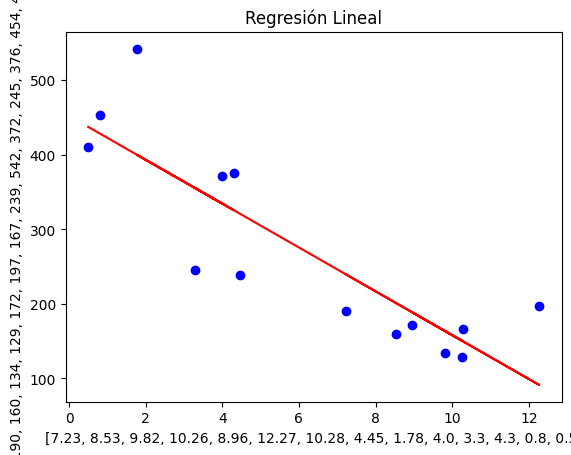

In [4]:
try:
  x = np.array(x_column)
  y = np.array(y_column)

  B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf = regresion(x, y, 0.05)

  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal', {sigma2})
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

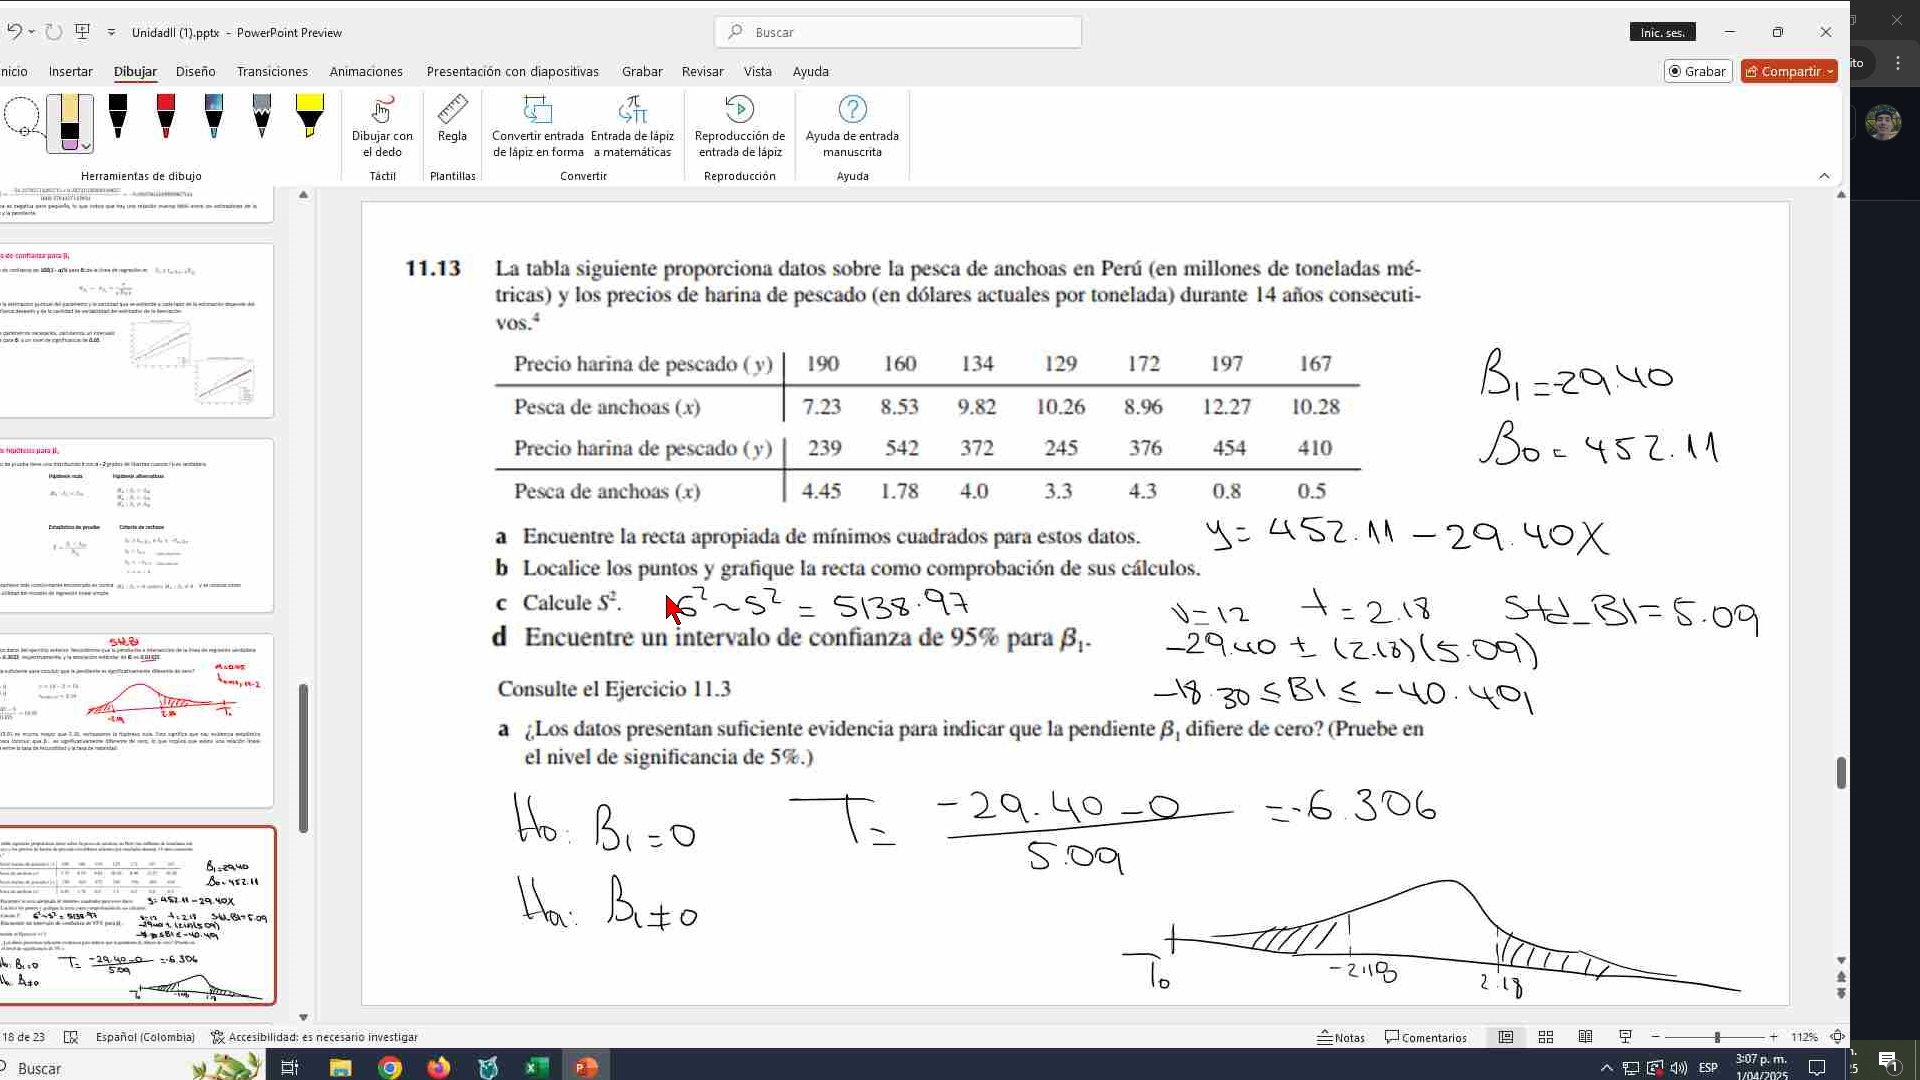

In [7]:
def simulate_regression_lines(x, y, num_simulations=5, noise_scale=5):
    n = len(x)
    slopes = []
    intercepts = []

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Datos", color='black')

    for i in range(num_simulations):
        # Simular errores aleatorios con mayor variabilidad
        errors = np.random.normal(loc=0, scale=noise_scale, size=n)
        y_simulated = y + errors

        # Ajustar la regresión lineal
        model = LinearRegression()
        model.fit(x.reshape(-1, 1), y_simulated)

        slopes.append(model.coef_[0])
        intercepts.append(model.intercept_)

        # Dibujar cada línea con más transparencia y colores distintos
        y_simulated_line = intercepts[i] + slopes[i] * x
        plt.plot(x, y_simulated_line, alpha=0.7, label=f"Línea {i+1}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Simulación de líneas de regresión")
    plt.legend()
    plt.show()

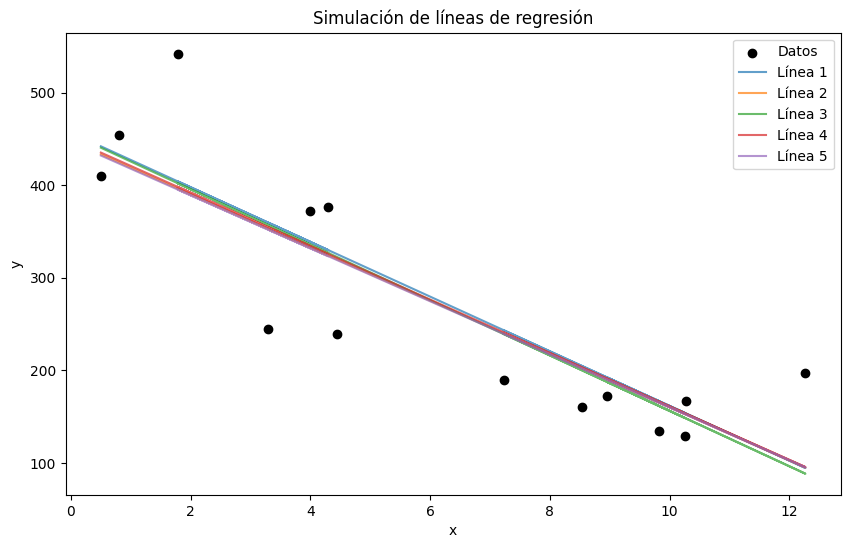

In [8]:
try:
  x = np.array(x_column)
  y = np.array(y_column)

  # Llama a la función para simular las líneas de regresión
  simulate_regression_lines(x, y)

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")